#Research Proposal


##**Title:** Analysis of relationship between employee's job satisfaction and employee attrition in the given IBM HR Attrition dataset

**Background:**
Employee attrition is a topic of critical concern for employers and corporations as it plays a huge role in the performance of the organization as a whole, company ethics and morales. For efficiently managing workforce, it is imperative to understand the relation between employee job satisfaction and the attrition rates. The fictional employee attrition dataset created by IBM datascientists sourced from Kaggle helps us derive valuable insights.

Aim of research: This research is focused on understanding the relationship between employee job satisfaction and the likelihood of employee attrition. The aim is to find if there is a statistically significant association between employee job satisfaction and employee attrition. The scope of this research is tied to the IBM HR attrition dataset.


**Hypothesis:**

*   **Null Hypothesis (Ho):** There is no significant relationship between job satisfaction and attrition.
*   **Alternate Hypothesis (Ha):** There is significant relationship between job satisfaction and attrition




**Dataset source:** https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset?resource=download


**About Dataset:**
The given dataset is a fictional attrition dataset created by IBM data scientists. The dataset consists of 35 columns and 1470 records that belong to categorical and numerical attributes.

**Hypothesis testing used:**

Chi square test is being used as this is a correlation identification between two categorical variables.

**Variables:**


*   Attrition
*   JobSatisfaction

**Importance of Research:**
It has become esential for employers and corporations to understand the various factors of attrition inorder to reduce them. Job satisfaction is a notable factor for attrition and organizations when they understand the association between job satisfaction and attrition, they can invovle in various employee engagement initiatives to minimize employee attrition. This research offers such valuable insights encompassing the given IBM dataset, which can be adopted to suit various organizations and corporations.

In [26]:
#imports
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats

In [6]:
#reading into dataframe
hr_data=pd.read_csv("/content/HR-Employee-Attrition.csv")
hr_data.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [7]:
hr_data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [8]:
hr_data.shape

(1470, 35)

In [9]:
hr_data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [17]:
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

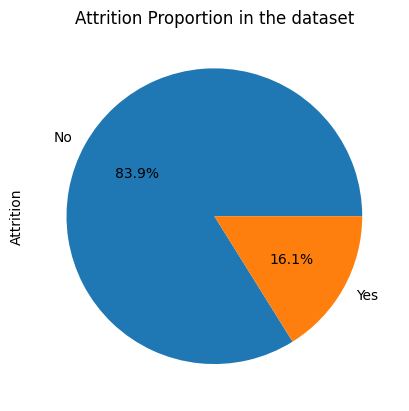

In [38]:
#showing attrition in proportion to the total records.
# Choosing pie chart as attrition attribute has two nominal values 'yes' and 'no'
hr_data['Attrition'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Attrition Proportion in the dataset")
plt.show()

In [10]:
#Looking at all possible values of job satisfaction. They are scaled from 1 to 4 where 1 is too low and 4 is too high.
print(hr_data['JobSatisfaction'])

0       4
1       2
2       3
3       3
4       2
       ..
1465    4
1466    1
1467    2
1468    2
1469    3
Name: JobSatisfaction, Length: 1470, dtype: int64


In [11]:
ab_cols=hr_data[['Attrition', 'JobSatisfaction']]
ab_cols.head(5)

,Attrition,JobSatisfaction
0,Yes,4
1,No,2
2,Yes,3
3,No,3
4,No,2


Text(0.5, 1.0, 'Attrition for each job satisfaction category')

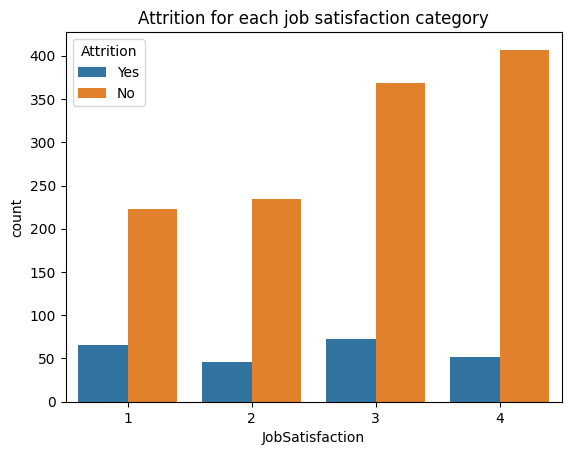

In [41]:
#Visualization on count of job satisfaction vs attrition

sns.countplot(data=hr_data, x="JobSatisfaction", hue="Attrition")
plt.title("Attrition for each job satisfaction category")

In [14]:
#Doing a chi square test as both the columns are categorical

#we are using crosstab of attrition as the data is nominal with no specific order. It is yes or no categorical value.
temp_df=pd.crosstab(ab_cols['Attrition'], ab_cols['JobSatisfaction'])

temp_df.head(5)

JobSatisfaction,1,2,3,4
Attrition,,,,
No,223,234,369,407
Yes,66,46,73,52


In [25]:
#cgi square test
from scipy.stats import chi2_contingency

chi_sq_test, p_value, x,y = chi2_contingency(temp_df)

print(chi_sq_test)
print(p_value)

17.505077010348
0.0005563004510387556


In [ ]:
#Level of significance is 0.05 as we look at 95% confidence interval

significance=0.05
p_value=0.00056

Inference:

Since the p value is less than significance level, we reject the null hypothesis which states that there is no relation between job satisfaction and employee attrition. Hence we accept the alternate hypothesis, which says that there is a correlation between job satisfaction and employee attrition.